# Project: Investigate Gapminder Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, I'm going to be investigating a couple of indicators in the Gapminder dataset. 
>
>My analysis questions are:
>1. What are the trends of each indicator over the years, and how does Saudi Arabia compare to them? 
>2. Does education affect other indicators around the world?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Income:
# Gross domestic product per person adjusted for differences in purchasing power 
# (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).
df_income = pd.read_csv('income_per_person.csv')
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [3]:
# Employment rate:
# Percentage of total population, age group 15+,
# that has been employed during the given year.
df_emp = pd.read_csv('aged_15plus_employment_rate_percent.csv')
df_emp.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.453,0.462,0.454,0.455,0.474,0.460,0.460,0.460,0.459,...,0.484,0.487,0.491,0.494,0.494,0.495,0.495,0.495,0.496,0.496
1,Albania,0.508,0.506,0.487,0.484,0.481,0.482,0.489,0.488,0.483,...,0.453,0.449,0.468,0.477,0.483,0.474,0.473,0.472,0.472,0.471
2,Algeria,0.344,0.337,0.331,0.326,0.307,0.321,0.332,0.324,0.315,...,0.394,0.371,0.368,0.372,0.372,0.372,0.372,0.371,0.369,0.367
3,Angola,0.598,0.597,0.597,0.595,0.592,0.592,0.592,0.592,0.593,...,0.722,0.722,0.721,0.717,0.713,0.709,0.706,0.703,0.700,0.697
4,Argentina,0.565,0.563,0.542,0.534,0.491,0.503,0.521,0.537,0.529,...,0.561,0.555,0.557,0.547,0.548,0.548,0.549,0.545,0.542,0.539


In [4]:
# Education men
# The average number of years of school attended by all people in the age and gender group specified, 
# including primary, secondary and tertiary education.
df_educ_men = pd.read_csv('mean_years_in_school_men_25_years_and_older.csv')
df_educ_men.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
1,Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2
2,Algeria,0.9,0.9,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7
3,Angola,1.4,1.5,1.5,1.6,1.7,1.7,1.8,1.9,2.0,...,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.9,5.0,5.1
4,Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.6,7.8,7.9,8.1,...,11.0,11.1,11.2,11.3,11.4,11.5,11.5,11.6,11.7,11.8


In [5]:
# Education women
# The average number of years of school attended by all people in the age and gender group specified, 
# including primary, secondary and tertiary education.
df_educ_women = pd.read_csv('mean_years_in_school_women_25_years_and_older.csv')
df_educ_women.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
1,Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4
2,Algeria,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,...,3.0,3.1,3.2,3.4,3.5,3.6,3.8,3.9,4.0,4.2
3,Angola,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,...,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8
4,Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.7,7.8,8.0,8.1,...,11.2,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2


### Data Cleaning

>In this section, I cleaned up my data by checking for missing values, removing duplicates, and creating a dataset that merges my indicators to use for graphing later on.

In [6]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [7]:
df_income.duplicated().sum()

0

In [8]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  179 non-null    object 
 1   1991     179 non-null    float64
 2   1992     179 non-null    float64
 3   1993     179 non-null    float64
 4   1994     179 non-null    float64
 5   1995     179 non-null    float64
 6   1996     179 non-null    float64
 7   1997     179 non-null    float64
 8   1998     179 non-null    float64
 9   1999     179 non-null    float64
 10  2000     179 non-null    float64
 11  2001     179 non-null    float64
 12  2002     179 non-null    float64
 13  2003     179 non-null    float64
 14  2004     179 non-null    float64
 15  2005     179 non-null    float64
 16  2006     179 non-null    float64
 17  2007     179 non-null    float64
 18  2008     179 non-null    float64
 19  2009     179 non-null    float64
 20  2010     179 non-null    float64
 21  2011     179 non

In [9]:
df_emp.duplicated().sum()

0

In [10]:
df_educ_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  174 non-null    object 
 1   1970     174 non-null    float64
 2   1971     174 non-null    float64
 3   1972     174 non-null    float64
 4   1973     174 non-null    float64
 5   1974     174 non-null    float64
 6   1975     174 non-null    float64
 7   1976     174 non-null    float64
 8   1977     174 non-null    float64
 9   1978     174 non-null    float64
 10  1979     174 non-null    float64
 11  1980     174 non-null    float64
 12  1981     174 non-null    float64
 13  1982     174 non-null    float64
 14  1983     174 non-null    float64
 15  1984     174 non-null    float64
 16  1985     174 non-null    float64
 17  1986     174 non-null    float64
 18  1987     174 non-null    float64
 19  1988     174 non-null    float64
 20  1989     174 non-null    float64
 21  1990     174 non

In [11]:
df_educ_men.duplicated().sum()

0

In [12]:
df_educ_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  174 non-null    object 
 1   1970     174 non-null    float64
 2   1971     174 non-null    float64
 3   1972     174 non-null    float64
 4   1973     174 non-null    float64
 5   1974     174 non-null    float64
 6   1975     174 non-null    float64
 7   1976     174 non-null    float64
 8   1977     174 non-null    float64
 9   1978     174 non-null    float64
 10  1979     174 non-null    float64
 11  1980     174 non-null    float64
 12  1981     174 non-null    float64
 13  1982     174 non-null    float64
 14  1983     174 non-null    float64
 15  1984     174 non-null    float64
 16  1985     174 non-null    float64
 17  1986     174 non-null    float64
 18  1987     174 non-null    float64
 19  1988     174 non-null    float64
 20  1989     174 non-null    float64
 21  1990     174 non

In [13]:
df_educ_women.duplicated().sum()

0

> Here I merged all the datasets to the data of the latest year available '2009' to find any relationships between them using graphs later on.

In [14]:
# Merge all datasets on 2009
df_gapminder = df_income[['country', '2009']].merge(df_emp[['country', '2009']], how = 'inner', on = 'country')
df_gapminder = df_gapminder.merge(df_educ_men[['country', '2009']], how = 'inner', on = 'country')
df_gapminder = df_gapminder.merge(df_educ_women[['country', '2009']], how = 'inner', on = 'country')

In [15]:
df_gapminder.head()

,country,2009_x,2009_y,2009_x,2009_y
0,Afghanistan,1500,0.483,2.6,0.4
1,Albania,9530,0.470,10.2,9.4
2,Algeria,12700,0.378,4.7,4.2
3,Angola,6290,0.683,5.1,2.8
4,Argentina,17300,0.559,9.8,10.1


> I renamed the columns.

In [16]:
df_gapminder.columns = ['country', 'income', 'employment rate', 'education men', 'education women']
df_gapminder.set_index('country', inplace = True)
df_gapminder.head()

,income,employment rate,education men,education women
country,,,,
Afghanistan,1500,0.483,2.6,0.4
Albania,9530,0.470,10.2,9.4
Algeria,12700,0.378,4.7,4.2
Angola,6290,0.683,5.1,2.8
Argentina,17300,0.559,9.8,10.1


In [17]:
df_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   income           170 non-null    int64  
 1   employment rate  170 non-null    float64
 2   education men    170 non-null    float64
 3   education women  170 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the trends of each indicator over the years, and how does Saudi Arabia compare to them? 

In [18]:
# Function to graph all countries in grey
def graph_countries(df):
    for country in df.index.values:
        plt.plot(df.loc[country], color = 'grey', alpha = 0.15)

In [19]:
df_income.set_index('country', inplace=True)

Text(150, 44500, 'Saudi Arabia')

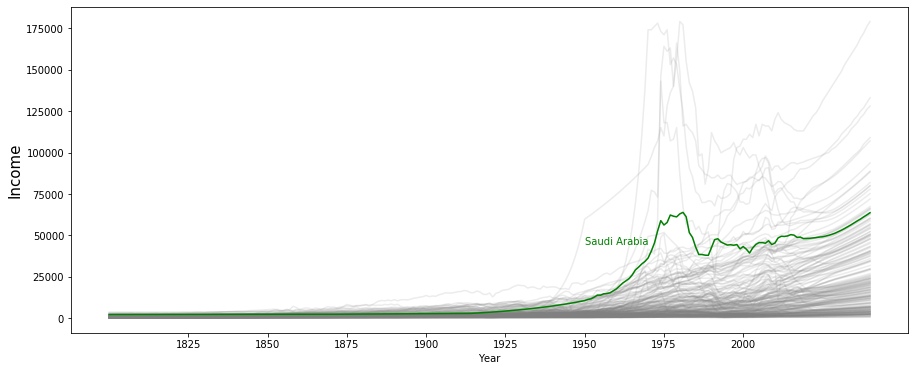

In [20]:
plt.figure(figsize = (15, 6))
plt.xlabel('Year')
plt.ylabel('Income', fontsize = 15)
plt.xticks([25, 50, 75, 100, 125, 150, 175, 200])
graph_countries(df_income)
plt.plot(df_income.loc['Saudi Arabia'], color = 'green')
plt.text(150, df_income.loc['Saudi Arabia']['2009'], 'Saudi Arabia', color = 'green')


In [21]:
df_emp.set_index('country', inplace=True)

Text(18, 0.524, 'Saudi Arabia')

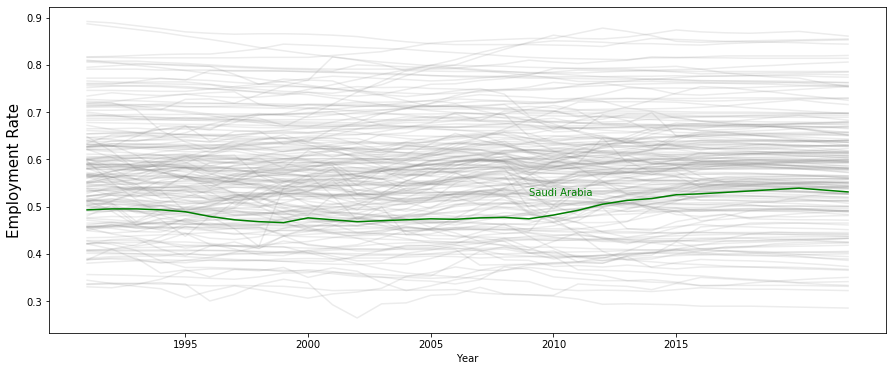

In [22]:
plt.figure(figsize = (15, 6))
plt.xlabel('Year')
plt.ylabel('Employment Rate', fontsize = 15)
plt.xticks([4, 9, 14, 19, 24])
graph_countries(df_emp)
plt.plot(df_emp.loc['Saudi Arabia'], color = 'green')
plt.text(18, df_emp.loc['Saudi Arabia']['2009'] + 0.05, 'Saudi Arabia', color = 'green')

In [24]:
df_educ_men.set_index('country', inplace=True)
df_educ_women.set_index('country', inplace=True)

Text(25, 7.0, 'Saudi Arabia')

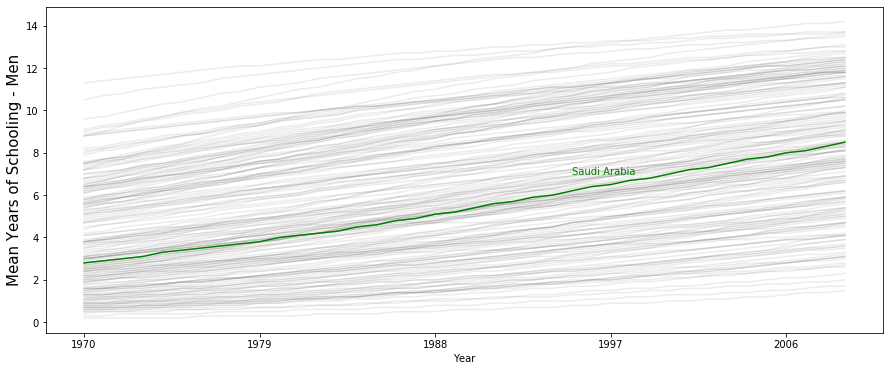

In [25]:
plt.figure(figsize = (15, 6))
plt.xlabel('Year')
plt.ylabel('Mean Years of Schooling - Men', fontsize = 15)
plt.xticks([0, 9, 18, 27, 36, 45])
graph_countries(df_educ_men)
plt.plot(df_educ_men.loc['Saudi Arabia'], color = 'green')
plt.text(25, df_educ_men.loc['Saudi Arabia']['2009']-1.5, 'Saudi Arabia', color = 'green')

Text(25, 3.5, 'Saudi Arabia')

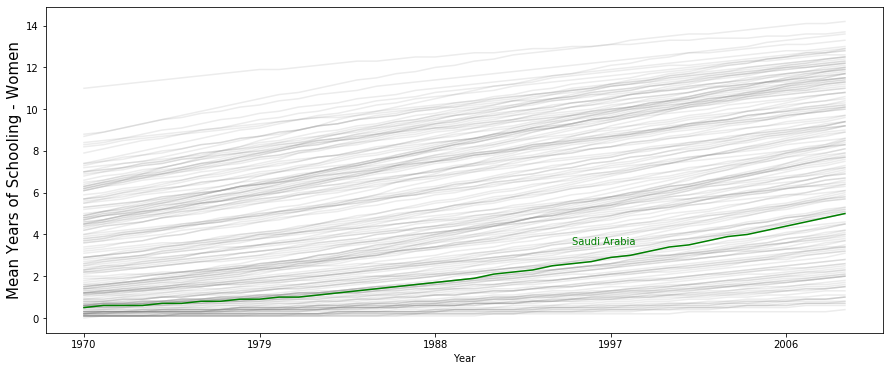

In [26]:
plt.figure(figsize = (15, 6))
plt.xlabel('Year')
plt.ylabel('Mean Years of Schooling - Women', fontsize = 15)
plt.xticks([0, 9, 18, 27, 36, 45])
graph_countries(df_educ_women)
plt.plot(df_educ_women.loc['Saudi Arabia'], color = 'green')
plt.text(25, df_educ_women.loc['Saudi Arabia']['2009'] - 1.5, 'Saudi Arabia', color = 'green')

>From these four graphs:
>1. There doesn't seem to be a global trend in regards to the income per person over the years.
>2. The employement rate around the world varies for each country, and is neither increasing or decreasing for Saudi Arabia.
>3. Education wise, there seems to be a worldwide trend increase of mean years of schooling for both men and women, in regards to Saudi Arabia, mean years of schooling in total is less for women than it is for men.
Although the data for education is only for individuals aged 25 years and older, and not for the whole population of the country.

### Research Question 2: Does education affect other indicators around the world?

>The data being analyzed in this section is in the year 2009, that's because two of the datasets that I downloaded ended in that year.

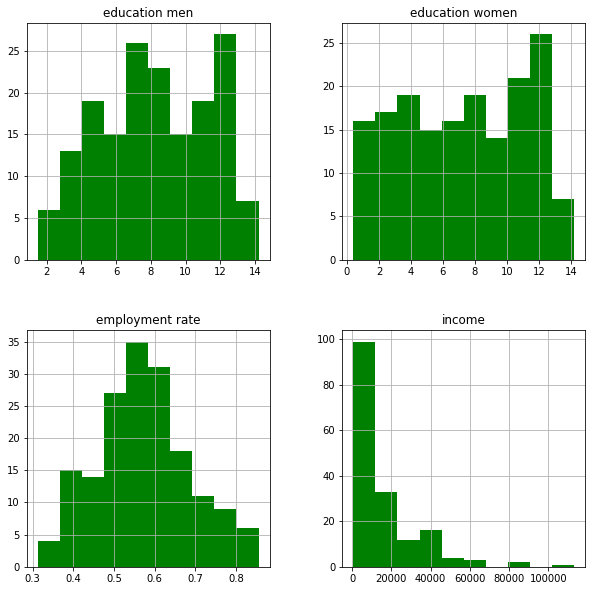

In [27]:
histogram = df_gapminder.hist(figsize=(10,10), color='green')

>From the histograms, we can see that income is positively skewed, the majority of country's yearly income per person is less than 10k USD. 

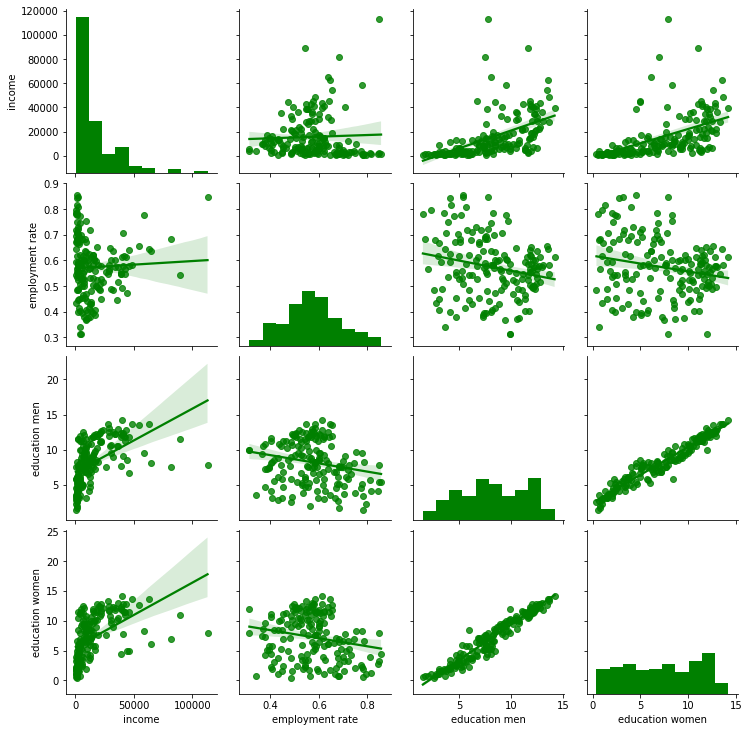

In [28]:
graph = sns.PairGrid(df_gapminder)
graph = graph.map_diag(plt.hist, color='green')
graph = graph.map_offdiag(sns.regplot, color='green')

> Fit linear regression models to the scatter plots.

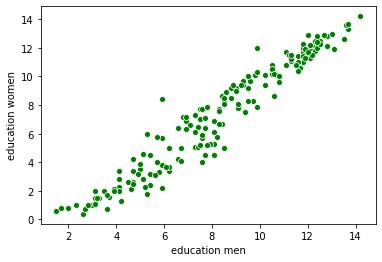

In [29]:
income_educ = sns.scatterplot(x='education men', y='education women', data=df_gapminder, color='green')

>There doesn't seem to be any clear relationships between education and the other indicators I chose, the only one that was noticeable was the positive correlation between education of men and women, meaning that if the majority of the country's male population continues their education for many years, so does the female population.

<a id='conclusions'></a>
## Conclusions
> • **Results:** In conclusion after analyzing the Gapminder dataset, not all indicator trends are necessarily applicable worldwide. There seems to be no relationship between years of education and income per person or employement rate worldwide. In the future, I think using machine learning algorithms to predict future data for each country, might help in the data analysis process.
>
> • **Limitations:** The data is incomplete for some indicators, for example, mean years of school for 25+ years only goes up to 2009. Some indicators are also split into different age groups and there isn't one dataset for the whole of the country's population. Splitting the countries into continents might have also helped with the analysis.